In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('2-olympic-medals.csv')

In [5]:
len(df[df['Year'] == 1896])

11

In [6]:
df['Gold'].sum() + df['Silver'].sum() + df['Bronze'].sum()

13747

In [7]:
df2 = pd.read_csv('olympic-medals.csv')

In [8]:
df2['Gold'].sum()

3729

In [9]:
s3 = []
for value in df['Year'].unique():
    s3.append({'year': str(value), 'value': len(df[df['Year'] == value]['Country'].unique())})
s3

[{'year': '1896', 'value': 11},
 {'year': '1900', 'value': 21},
 {'year': '1904', 'value': 10},
 {'year': '1908', 'value': 19},
 {'year': '1912', 'value': 18},
 {'year': '1920', 'value': 22},
 {'year': '1924', 'value': 27},
 {'year': '1928', 'value': 33},
 {'year': '1932', 'value': 27},
 {'year': '1936', 'value': 32},
 {'year': '1948', 'value': 37},
 {'year': '1952', 'value': 43},
 {'year': '1956', 'value': 38},
 {'year': '1960', 'value': 44},
 {'year': '1964', 'value': 41},
 {'year': '1968', 'value': 44},
 {'year': '1972', 'value': 48},
 {'year': '1976', 'value': 41},
 {'year': '1980', 'value': 36},
 {'year': '1984', 'value': 47},
 {'year': '1988', 'value': 52},
 {'year': '1992', 'value': 64},
 {'year': '1996', 'value': 79},
 {'year': '2000', 'value': 80},
 {'year': '2004', 'value': 74},
 {'year': '2008', 'value': 87}]

In [11]:
s4_gold = []
for value in df['Year'].unique():
    s4_gold.append({'year': value, 'value': df[df['Year'] == value]['Gold'].sum(), 'avg': df[df['Year'] == value]['Gold'].mean()})
s4_gold

[{'year': 1896, 'value': 43, 'avg': 3.909090909090909},
 {'year': 1900, 'value': 90, 'avg': 4.285714285714286},
 {'year': 1904, 'value': 96, 'avg': 9.6},
 {'year': 1908, 'value': 110, 'avg': 5.7894736842105265},
 {'year': 1912, 'value': 103, 'avg': 5.722222222222222},
 {'year': 1920, 'value': 156, 'avg': 7.090909090909091},
 {'year': 1924, 'value': 126, 'avg': 4.666666666666667},
 {'year': 1928, 'value': 110, 'avg': 3.3333333333333335},
 {'year': 1932, 'value': 116, 'avg': 4.296296296296297},
 {'year': 1936, 'value': 130, 'avg': 4.0625},
 {'year': 1948, 'value': 138, 'avg': 3.72972972972973},
 {'year': 1952, 'value': 149, 'avg': 3.4651162790697674},
 {'year': 1956, 'value': 153, 'avg': 4.026315789473684},
 {'year': 1960, 'value': 152, 'avg': 3.4545454545454546},
 {'year': 1964, 'value': 163, 'avg': 3.975609756097561},
 {'year': 1968, 'value': 174, 'avg': 3.9545454545454546},
 {'year': 1972, 'value': 195, 'avg': 4.0625},
 {'year': 1976, 'value': 198, 'avg': 4.829268292682927},
 {'year':

In [16]:
s5 = []
for value in df['Year'].unique():
    tmp = {
        'year': value
    }
    if 'United States' in df[df['Year'] == value]['Country'].values:
        tmp['usa'] = df[(df['Year'] == value) & (df['Country'] == 'United States')].iloc[0]['Gold']
    else:
        tmp['usa'] = 0
    if 'China' in df[df['Year'] == value]['Country'].values:
        tmp['china'] = df[(df['Year'] == value) & (df['Country'] == 'China')].iloc[0]['Gold']
    else:
        tmp['china'] = 0
    s5.append(tmp)
s5

[{'year': 1896, 'usa': 11, 'china': 0},
 {'year': 1900, 'usa': 19, 'china': 0},
 {'year': 1904, 'usa': 78, 'china': 0},
 {'year': 1908, 'usa': 23, 'china': 0},
 {'year': 1912, 'usa': 25, 'china': 0},
 {'year': 1920, 'usa': 41, 'china': 0},
 {'year': 1924, 'usa': 45, 'china': 0},
 {'year': 1928, 'usa': 22, 'china': 0},
 {'year': 1932, 'usa': 41, 'china': 0},
 {'year': 1936, 'usa': 24, 'china': 0},
 {'year': 1948, 'usa': 38, 'china': 0},
 {'year': 1952, 'usa': 40, 'china': 0},
 {'year': 1956, 'usa': 32, 'china': 0},
 {'year': 1960, 'usa': 34, 'china': 0},
 {'year': 1964, 'usa': 36, 'china': 0},
 {'year': 1968, 'usa': 45, 'china': 0},
 {'year': 1972, 'usa': 33, 'china': 0},
 {'year': 1976, 'usa': 34, 'china': 0},
 {'year': 1980, 'usa': 0, 'china': 0},
 {'year': 1984, 'usa': 83, 'china': 15},
 {'year': 1988, 'usa': 36, 'china': 5},
 {'year': 1992, 'usa': 37, 'china': 16},
 {'year': 1996, 'usa': 44, 'china': 16},
 {'year': 2000, 'usa': 36, 'china': 28},
 {'year': 2004, 'usa': 36, 'china': 3

In [17]:
from sklearn.linear_model import LinearRegression

In [76]:
x = df2[df2['Country'] == 'South Korea']['GDP'].values
y = df2[df2['Country'] == 'South Korea']['Weighted Count'].values

reg = LinearRegression()
reg.fit(np.array(x).reshape((-1, 1)), np.array(y).reshape((-1, 1)))

[{"gdp": i, "count": j} for i, j in zip(x, y)]

[{'gdp': 12453900758, 'count': 2},
 {'gdp': 14404394735, 'count': 2},
 {'gdp': 22742570189, 'count': 3},
 {'gdp': 36707315242, 'count': 5},
 {'gdp': 53401919698, 'count': 3},
 {'gdp': 80542593906, 'count': 2},
 {'gdp': 125952724890, 'count': 9},
 {'gdp': 231693378455, 'count': 37},
 {'gdp': 355269385284, 'count': 67},
 {'gdp': 487386010973, 'count': 58},
 {'gdp': 655101259481, 'count': 56},
 {'gdp': 781601867339, 'count': 54},
 {'gdp': 957347843581, 'count': 60},
 {'gdp': 1140973809045, 'count': 67}]

In [78]:
a = reg.coef_[0][0]
b = reg.intercept_[0]
print(a, b)
print(13053900758 * a + b, 1000973809045 * a + b)

6.400018804254432e-11 7.703000987961232
8.538453091161944 71.76551299250308


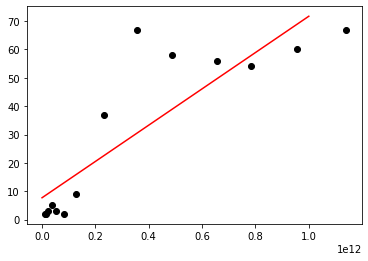

In [68]:
plt.plot([0, 1000000000000], [b, 1000000000000 * a + b], c='r')
# plt.plot([0, 3], [b, 3 * a + b], c='r')
plt.scatter(x, y, c='black')
plt.show()

In [85]:
s7 = {}
for value in df[df['Year'] == 2008]['Country']:
    if value in df[df['Year'] == 2004]['Country'].values:
        s7[value] = df[(df['Year'] == 2008) & (df['Country'] == value)].iloc[0]['Weighted Count'] - df[(df['Year'] == 2004) & (df['Country'] == value)].iloc[0]['Weighted Count']
    else:
        s7[value] = df[(df['Year'] == 2008) & (df['Country'] == value)].iloc[0]['Weighted Count']
s7

{'Jamaica': 16,
 'Bahamas': -1,
 'Iceland': 2,
 'Slovenia': 4,
 'Norway': 5,
 'Australia': -10,
 'Mongolia': 9,
 'New Zealand': 3,
 'Estonia': 1,
 'Cuba': -13,
 'Belarus': 7,
 'Trinidad and Tobago': 3,
 'Bahrain': 3,
 'Georgia': 2,
 'Latvia': -2,
 'Slovakia': 2,
 'Denmark': 1,
 'Netherlands': -4,
 'Hungary': -18,
 'Lithuania': 0,
 'Armenia': 6,
 'Britain': 41,
 'Croatia': -2,
 'Czech Republic': 2,
 'South Korea': 7,
 'Kazakhstan': 7,
 'Switzerland': 2,
 'Finland': 3,
 'Azerbaijan': 4,
 'France': 6,
 'Bulgaria': -9,
 'Germany': -8,
 'Ukraine': 0,
 'Canada': 9,
 'Sweden': -8,
 'Russia': -34,
 'Ireland': 4,
 'Italy': -9,
 'Panama': 3,
 'Spain': 2,
 'Romania': -23,
 'Mauritius': 1,
 'Kenya': 16,
 'Zimbabwe': 3,
 'United States': 7,
 'Kyrgyzstan': 3,
 'Poland': 4,
 'Greece': -28,
 'Dominican Republic': 2,
 'Austria': -11,
 'Belgium': 0,
 'Portugal': 0,
 'North Korea': 2,
 'Tajikistan': 3,
 'Singapore': 2,
 'Serbia': 4,
 'Japan': -29,
 'Uzbekistan': 0,
 'Tunisia': 3,
 'Moldova': 1,
 'Argenti